# Multilayer Percetron from scratch per la classificazione di numeri scritti a mano

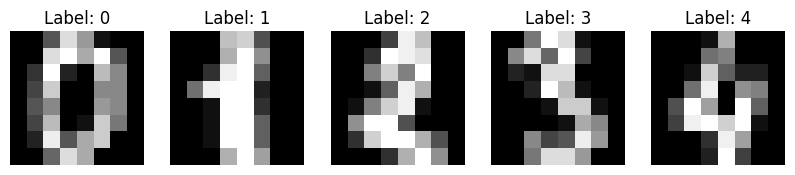

Numero di esempi : 1797
Dimensione di un esempio: 64


In [17]:
# Esempio campionin del dataset

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Carichiamo il dataset Digits
digits = load_digits()
X,y = digits.data, digits.target


"Funzione per stampare a video le immagini degli esempi con le relative"
def plot_digits(X, y, indices):
    n = len(indices)
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i + 1)
        img = X[idx].reshape(8, 8)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {y[idx]}')
        plt.axis('off')
    plt.show()


plot_digits(X, y, range(5))

print(f"Numero di esempi : {X.shape[0]}")
print(f"Dimensione di un esempio: {X.shape[1]}")

---------------------------------------------Preparazione dataset----------------------------------------------------------
---------------------------------------------Scelta degli iperparametri----------------------------------------------------------
---------------------------------------------Hidden activation function sigmoid--------------------------------------------
Iterazione 0: Cost = 2.3040992947659693
Iterazione 100: Cost = 2.2896639277608672
Iterazione 200: Cost = 2.176610047212289
Iterazione 300: Cost = 1.7411050694107109
Iterazione 400: Cost = 1.267578752366791
Iterazione 500: Cost = 0.9513039585638279
Iterazione 600: Cost = 0.7446208563433755
Iterazione 700: Cost = 0.6026039982495954
Iterazione 800: Cost = 0.49955887710968433
Iterazione 900: Cost = 0.42137687804622864
Iterazione 1000: Cost = 0.36069757899122085
Iterazione 1100: Cost = 0.3131499166494517
Iterazione 1200: Cost = 0.27561019870512315
Iterazione 1300: Cost = 0.2456581119587044
Iterazione 1400: Cost = 0.2214

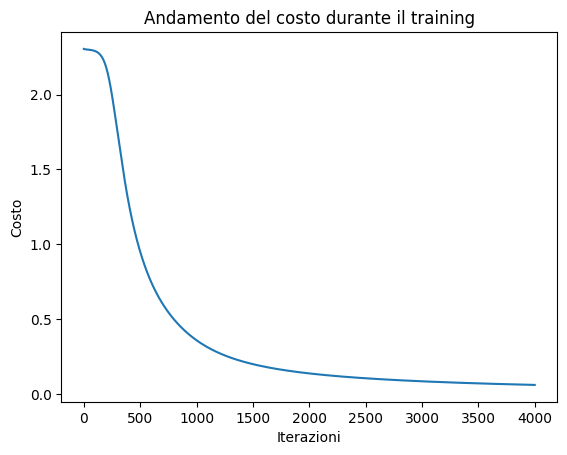

Training Accuracy: 99.30%
Testing Accuracy: 96.94%

Classification Report - Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       0.97      0.99      0.98       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       0.99      0.99      0.99       135
           5       0.99      0.99      0.99       135
           6       1.00      0.99      1.00       146
           7       1.00      1.00      1.00       145
           8       0.98      0.97      0.98       144
           9       0.99      0.99      0.99       140

    accuracy                           0.99      1437
   macro avg       0.99      0.99      0.99      1437
weighted avg       0.99      0.99      0.99      1437


Classification Report - Test Set:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
     

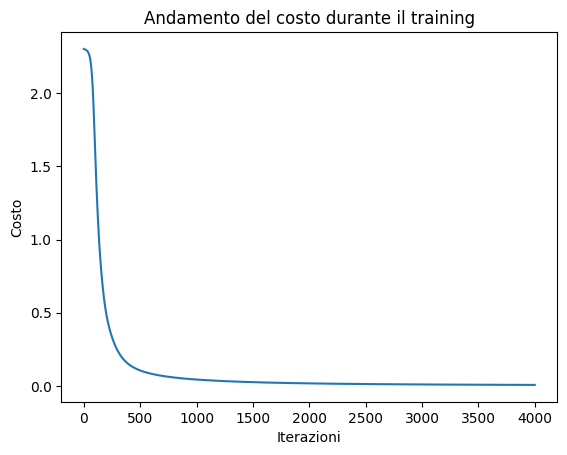

Training Accuracy: 100.00%
Testing Accuracy: 96.67%

Classification Report - Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437


Classification Report - Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
    

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

class MLP():
    """
    Multi-Layer Perceptron (MLP) con un input layer, un hidden layer ed un output layer,
    con funzione di attivazione hidden layer sigmoid / relu a seconda della chiamata di inizializzaione,
    addestrata con gradient descent, e Softmax per classificazione multi-classe.
    """

    def __init__(self, X, Y, iterations=1000, lr=0.001, input_layer=64, hidden_layer=32, output_layer=10, act_fun = "sigmoid"):

        self.X = X  # Matrice features di input
        self.Y = Y  # Etichette one-hot (ground truth)

        self.iterations = iterations  # Numero di iterazioni
        self.lr = lr  # Learning rate

        self.input_layer = input_layer # numero di neuroni nell'input layer
        self.hidden_layer = hidden_layer # numero di neuroni nell'hidden layer
        self.output_layer = output_layer # numero di neuroni nell'output layer

        self.act_fun = act_fun # funzione di attivazione hidden layer : sigmoid o relu

        # Inizializzazione pesi e bias in maniera randomica
        self.weight_matrix_1 = np.random.randn(self.input_layer, self.hidden_layer) * 0.01
        self.bias_1 = np.zeros((1, self.hidden_layer))

        self.weight_matrix_2 = np.random.randn(self.hidden_layer, self.output_layer)*0.01
        self.bias_2 = np.zeros((1, self.output_layer))

        self.costs = []  # costi durante il training


    "Funzione di attivazione sigmoid"
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    "Derivata funzione di attivazione sigmoid"
    def sigmoid_derivative(self, z):
        return z * (1 - z)

    "Funzione di attivazione ReLU"
    def relu(self, z):
        return np.maximum(0, z)

    "Derivata funzione di attivazione ReLu"
    def relu_derivative(self, z):
        return (z > 0).astype(float)

    "Funzione di attivazione softmax"
    def softmax(self, z):
        exp_z = np.exp(z)
        softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return softmax_probs

    "Funzione di perdita/costo"
    def categorical_crossentropy(self):
        return -np.sum(self.Y * np.log(self.p_hat + 1e-9)) / len(self.Y)   # Average cross-entropy loss


    "Aggiorna i parametri tramite discesa di gradiente"
    def update_params(self, dL_dw1, dL_db1, dL_dw2, dL_db2):

        self.weight_matrix_1 -= self.lr * dL_dw1
        self.bias_1 -= self.lr * dL_db1

        self.weight_matrix_2 -= self.lr * dL_dw2
        self.bias_2 -= self.lr * dL_db2


    "Forward propagation in avanti attraverso la rete neurale"
    def forward_propagation(self):

        # input -> hidden layer
        # Trasformazione lineare + attivazione nel hidden layer

        self.z1 = np.dot(self.X, self.weight_matrix_1) + self.bias_1

        if self.act_fun == "sigmoid":
           self.a1 = self.sigmoid(self.z1)
        elif self.act_fun == "relu":
           self.a1 = self.relu(self.z1)

        # hidden layer -> output layer
        # Trasformazione lineare + attivazione nel output layer

        self.z2 = np.dot(self.a1, self.weight_matrix_2) + self.bias_2
        self.p_hat = self.softmax(self.z2)

        # distribuzione predizione sulle classi
        return self.p_hat


    "Backward propagation all'indietro attraverso la rete."
    def backward_propagation(self):

        m = X.shape[0]  # numero di esempi

        # output layer gradients
        dL_dz2 = self.p_hat - self.Y
        dL_dw2 = np.dot(self.a1.T, dL_dz2)  /m
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)  /m

        # hidden layer gradients

        if self.act_fun == "sigmoid":
           dL_dz1 = np.dot(dL_dz2, self.weight_matrix_2.T) * self.sigmoid_derivative(self.a1)
        elif self.act_fun == "relu":
           dL_dz1 = np.dot(dL_dz2, self.weight_matrix_2.T) * self.relu_derivative(self.a1)

        dL_dw1 = np.dot(self.X.T, dL_dz1)  /m
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True) /m

        # Aggiornamento pesi e bias
        self.update_params(dL_dw1, dL_db1, dL_dw2, dL_db2)


    "Addestramento della rete neurale"
    def train(self, verbose=True):

        for i in range(self.iterations):

            # per ogni iterazione effettuaimo un passo in forward ed uno in backward, calcoliamo l'errore, aggiorniamo i parametri, e ripetiamo
            self.forward_propagation()
            cost = self.categorical_crossentropy()
            self.backward_propagation()
            self.costs.append(cost)

            # ogni 100 iterazioni stampiamo il costo dell'iterata corrente
            if verbose and i % 100 == 0:
                print(f"Iterazione {i}: Cost = {cost}")

        if verbose:
          print("Training completato!")

          # Grafico dell'andamento del costo durante l'addestramento
          plt.plot(self.costs)
          plt.xlabel('Iterazioni')
          plt.ylabel('Costo')
          plt.title('Andamento del costo durante il training')
          plt.show()



    "Effettua la predizione per un nuovo esempio di input"
    def predict(self, X):

        # input -> hidden layer
        z1 = np.dot(X, self.weight_matrix_1) + self.bias_1
        if self.act_fun == "sigmoid":
           a1 = self.sigmoid(z1)
        elif self.act_fun == "relu":
           a1 = self.relu(z1)

        # hidden layer -> output layer
        z2 = np.dot(a1, self.weight_matrix_2) + self.bias_2
        p_hat = self.softmax(z2)

        # estraiamo la classe con probabilità più alta da restituire come predizione
        p_hat = np.argmax(p_hat, axis=1)

        return p_hat



    "Restituisce la distribuzione della predizione per un nuovo esempio di input"
    def predict_proba(self, X):

        # input -> hidden layer
        z1 = np.dot(X, self.weight_matrix_1) + self.bias_1
        if self.act_fun == "sigmoid":
           a1 = self.sigmoid(z1)
        elif self.act_fun == "relu":
           a1 = self.relu(z1)

        # hidden layer -> output layer
        z2 = np.dot(a1, self.weight_matrix_2) + self.bias_2
        p_hat = self.softmax(z2)

        return p_hat

    def fit(self, X, y):
        """Adatta il modello ai dati di addestramento."""
        self.train(X, y)  # Metodo di addestramento che hai già
        return self  # Return il modello per la compatibilità con scikit-learn

    def get_params(self, deep=True):
        # Restituisce i parametri del modello MLP per l'ottimizzazione e la clonazione
        return {
            'input_layer': self.input_layer,
            'hidden_layer': self.hidden_layer,
            'output_layer': self.output_layer,
            'act_fun': self.act_fun,
            'iterations': self.iterations,
            'learning_rate': self.lr
        }




print("---------------------------------------------Preparazione dataset----------------------------------------------------------")

# carichiamo il dataset Digits
digits = load_digits()
X = digits.data
y = digits.target.reshape(-1, 1)  # rendiamo y una matrice di una sola colonna (ground truth)

# normalizziamo i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# one-hot encoding delle etichette
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# splittiamo i dati in train e test : 80% train , 20%test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


print("---------------------------------------------Scelta degli iperparametri----------------------------------------------------------")

# definiamo il numero di neuroni dei layer della rete neurale
num_neuron_input_layer = X_train.shape[1]  # 64 features di input (immagini 8*8 -> 64 pixel)
num_neuron_hidden_layer = 32  # modificabile per vedere cosa succede
num_neuron_output_layer = y_train.shape[1]  # 10 classi di output (digits 0-9)

it = 4000  # numero di iterazioni
lr = 0.1  # learning rate


print("---------------------------------------------Hidden activation function sigmoid--------------------------------------------")


# inizializzazione rete neurale
mlp_1 = MLP(X_train, y_train, iterations=it, lr=lr, input_layer=num_neuron_input_layer, hidden_layer=num_neuron_hidden_layer, output_layer=num_neuron_output_layer, act_fun = "sigmoid")

# addestramento
mlp_1.train()

# effettuiamo le predizioni per gli esempi di test
y_pred_train = mlp_1.predict(X_train)
y_pred_test = mlp_1.predict(X_test)

# convertiamo le etichette one-hot in etichette singole
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# calcoliamo l'accuracy
train_accuracy = accuracy_score(y_train_labels, y_pred_train)
test_accuracy = accuracy_score(y_test_labels, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report - Training Set:\n")
print(classification_report(y_train_labels, y_pred_train))

print("\nClassification Report - Test Set:\n")
print(classification_report(y_test_labels, y_pred_test))



print("\n\n---------------------------------------------Hidden activation function ReLu--------------------------------------------")

mlp_2 = MLP(X_train, y_train, iterations=it, lr=lr, input_layer=num_neuron_input_layer, hidden_layer=num_neuron_hidden_layer, output_layer=num_neuron_output_layer, act_fun = "relu")

mlp_2.train()

y_pred_train = mlp_2.predict(X_train)
y_pred_test = mlp_2.predict(X_test)

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

train_accuracy = accuracy_score(y_train_labels, y_pred_train)
test_accuracy = accuracy_score(y_test_labels, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report - Training Set:\n")
print(classification_report(y_train_labels, y_pred_train))

print("\nClassification Report - Test Set:\n")
print(classification_report(y_test_labels, y_pred_test))

---------------------------------------------Hidden activation function sigmoid--------------------------------------------
Probabilità per le immagini stampate:

Immagine 1 (Etichetta: 6, Predizione: 6)
  Classe 0: 0.0017
  Classe 1: 0.0008
  Classe 2: 0.0001
  Classe 3: 0.0000
  Classe 4: 0.0052
  Classe 5: 0.0004
  Classe 6: 0.9835
  Classe 7: 0.0000
  Classe 8: 0.0080
  Classe 9: 0.0002

Immagine 2 (Etichetta: 9, Predizione: 9)
  Classe 0: 0.0066
  Classe 1: 0.0000
  Classe 2: 0.0000
  Classe 3: 0.0024
  Classe 4: 0.0002
  Classe 5: 0.0459
  Classe 6: 0.0000
  Classe 7: 0.0046
  Classe 8: 0.0020
  Classe 9: 0.9383

Immagine 3 (Etichetta: 3, Predizione: 3)
  Classe 0: 0.0000
  Classe 1: 0.0000
  Classe 2: 0.0012
  Classe 3: 0.9952
  Classe 4: 0.0000
  Classe 5: 0.0005
  Classe 6: 0.0000
  Classe 7: 0.0001
  Classe 8: 0.0019
  Classe 9: 0.0011

Immagine 4 (Etichetta: 7, Predizione: 7)
  Classe 0: 0.0006
  Classe 1: 0.0019
  Classe 2: 0.0002
  Classe 3: 0.0014
  Classe 4: 0.0018
  Cla

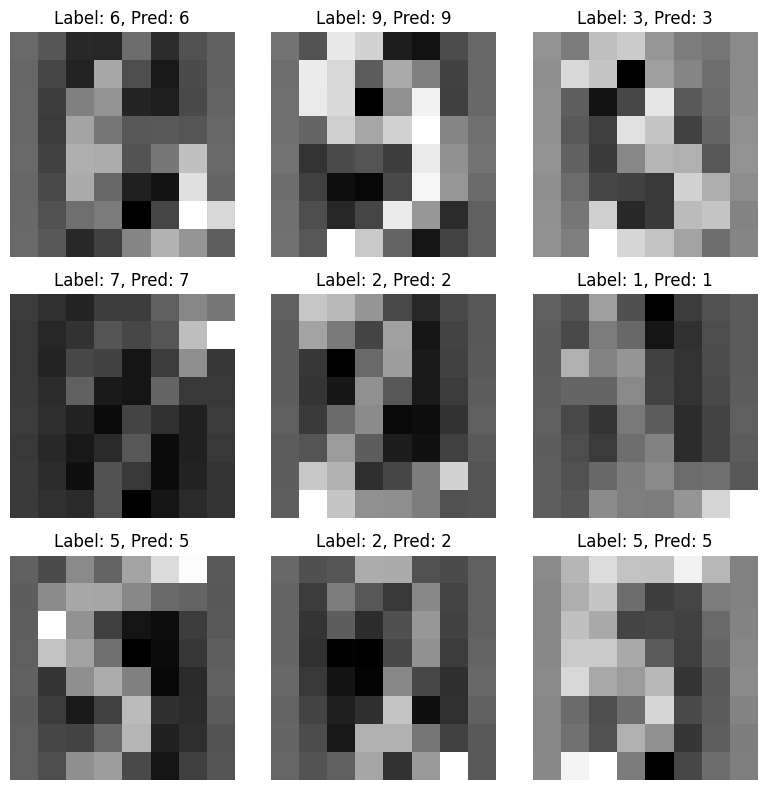



---------------------------------------------Hidden activation function ReLu--------------------------------------------
Probabilità per le immagini stampate:

Immagine 1 (Etichetta: 6, Predizione: 6)
  Classificazione 0: 0.0000
  Classificazione 1: 0.0000
  Classificazione 2: 0.0000
  Classificazione 3: 0.0000
  Classificazione 4: 0.0000
  Classificazione 5: 0.0000
  Classificazione 6: 1.0000
  Classificazione 7: 0.0000
  Classificazione 8: 0.0000
  Classificazione 9: 0.0000

Immagine 2 (Etichetta: 9, Predizione: 9)
  Classificazione 0: 0.0001
  Classificazione 1: 0.0000
  Classificazione 2: 0.0000
  Classificazione 3: 0.0000
  Classificazione 4: 0.0000
  Classificazione 5: 0.0185
  Classificazione 6: 0.0000
  Classificazione 7: 0.0000
  Classificazione 8: 0.0000
  Classificazione 9: 0.9814

Immagine 3 (Etichetta: 3, Predizione: 3)
  Classificazione 0: 0.0000
  Classificazione 1: 0.0000
  Classificazione 2: 0.0000
  Classificazione 3: 1.0000
  Classificazione 4: 0.0000
  Classificaz

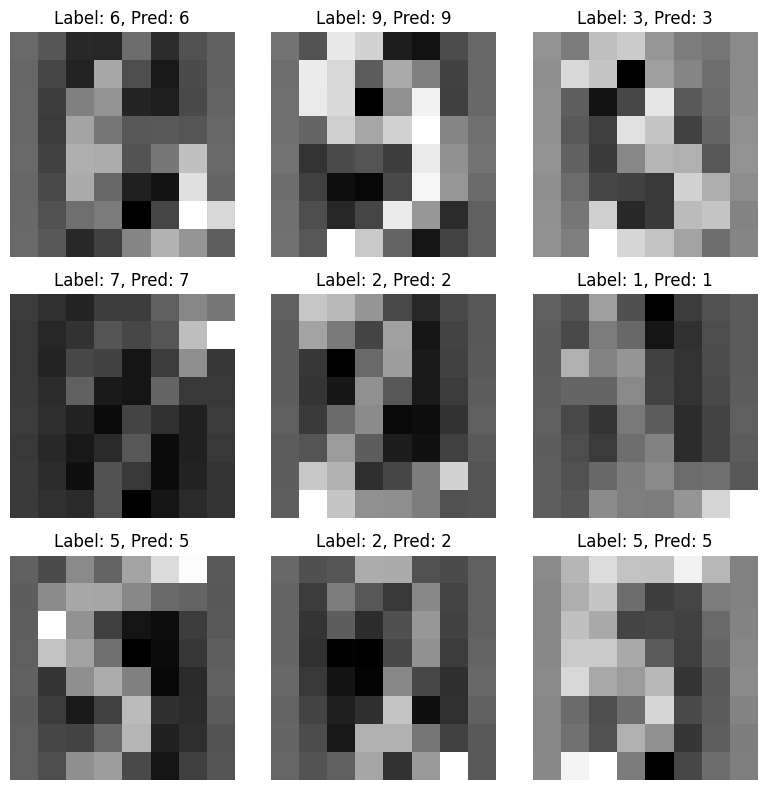

In [19]:
print("---------------------------------------------Hidden activation function sigmoid--------------------------------------------")

# Otteniamo le probabilità per le prime 9 immagini
p_hat_test = mlp_1.predict_proba(X_test[:9])

# Stampa delle probabilità
print("Probabilità per le immagini stampate:")
for idx in range(9):
    true_label = y_test_labels[idx]
    pred_label = y_pred_test[idx]
    print(f"\nImmagine {idx + 1} (Etichetta: {true_label}, Predizione: {pred_label})")
    for classe, prob in enumerate(p_hat_test[idx]):
        print(f"  Classe {classe}: {prob:.4f}")


# Visualizzazione di 9 esempi dal test set con le predizioni del modello

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    img = X_test[i].reshape(8, 8)  # Ricostruisce l'immagine da 64 pixel (8x8)
    true_label = y_test_labels[i]
    pred_label = y_pred_test[i]

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {true_label}, Pred: {pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


print("\n\n---------------------------------------------Hidden activation function ReLu--------------------------------------------")


# Otteniamo le probabilità per le prime 9 immagini
p_hat_test = mlp_2.predict_proba(X_test[:9])

# Stampa delle probabilità
print("Probabilità per le immagini stampate:")
for idx in range(9):
    true_label = y_test_labels[idx]
    pred_label = y_pred_test[idx]
    print(f"\nImmagine {idx + 1} (Etichetta: {true_label}, Predizione: {pred_label})")
    for classe, prob in enumerate(p_hat_test[idx]):
        print(f"  Classificazione {classe}: {prob:.4f}")


# Visualizzazione di 9 esempi dal test set con le predizioni del modello

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    img = X_test[i].reshape(8, 8)  # Ricostruisce l'immagine da 64 pixel (8x8)
    true_label = y_test_labels[i]
    pred_label = y_pred_test[i]

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {true_label}, Pred: {pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()



# GridSearch + Cross Validation per trovare la migliore configurazione di iperparametri

In [20]:
from sklearn.model_selection import KFold

"Ricerca dei migliori iperparametri tramite GridSearch manuale e Cross Validation, e addestramento del miglior modello"
def train_nn_grid_search_cv(X, y, param_grid, k=5):

    # inizializzazione la K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    best_model = None
    best_score = 0
    best_params = {}

    print(f"Numero di combinazioni da provare: {len(param_grid['num_units_input_layer']) * len(param_grid['num_units_hidden_layer']) * len(param_grid['num_units_output_layer']) * len(param_grid['act_fun']) * len(param_grid['iterations']) * len(param_grid['learning_rate'])}")

    # iperparametri già fissati
    input_units = param_grid['num_units_input_layer'][0]
    output_units = param_grid['num_units_output_layer'][0]

    # iperparametri da ricercare
    for hidden_units in param_grid['num_units_hidden_layer']:
        for act_fun in param_grid['act_fun']:
            for iterations in param_grid['iterations']:
                for learning_rate in param_grid['learning_rate']:

                    fold_accuracies = []

                    # Ciclo sui fold
                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]

                        # creazione e addestramento del modello corrente
                        mlp = MLP(
                            X=X_train,
                            Y=y_train,
                            input_layer=input_units,
                            hidden_layer=hidden_units,
                            output_layer=output_units,
                            act_fun=act_fun,
                            iterations=iterations,
                            lr=learning_rate
                        )

                        mlp.train(verbose=False)

                        # predizioni e calcolo dell'accuratezza
                        y_pred = mlp.predict(X_val)
                        accuracy = np.mean(np.argmax(y_val, axis=1) == y_pred)
                        fold_accuracies.append(accuracy)

                    # calcoliamo l'accuratezza media sul cross-validation
                    avg_accuracy = np.mean(fold_accuracies)
                    print(f"Config: input units[{input_units}], hidden_units[{hidden_units}], output_units[{output_units}], act_fun[{act_fun}], iterations[{iterations}], learning_rate[{learning_rate}] -> CV avg Accuracy: {avg_accuracy:.4f}")

                    # se troviamo un modello migliore del vecchio miglior modello ggiorniamo il miglior modello corrente e salviamo la configurazione degli iperparametri
                    if avg_accuracy > best_score:
                       best_score = avg_accuracy
                       best_model = mlp
                       best_params = {
                                    'num_units_input_layer': input_units,
                                    'num_units_hidden_layer': hidden_units,
                                    'num_units_output_layer': output_units,
                                    'act_fun': act_fun,
                                    'iterations': iterations,
                                    'learning_rate': learning_rate
                      }

    print(f"\nMiglior configurazione trovata: {best_params} con accuracy {best_score:.4f}")
    return best_model


# carichiamo il dataset Digits
digits = load_digits()
X = digits.data
y = digits.target.reshape(-1, 1)


# normalizziamo i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# one-hot encoding delle etichette
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# definizione della griglia di ricerca degli iperparametri
param_grid = {
    'num_units_input_layer': [64],
    'num_units_hidden_layer': [16, 32],
    'num_units_output_layer': [10],
    'learning_rate': [0.01, 0.001],
    'iterations': [1000, 2000, 4000],
    'act_fun' : ["sigmoid","relu"]
}


best_model = train_nn_grid_search_cv(X_scaled, y_encoded, param_grid)


y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report - Training Set:\n")
print(classification_report(y_train_labels, y_pred_train))

print("\nClassification Report - Test Set:\n")
print(classification_report(y_test_labels, y_pred_test))


Numero di combinazioni da provare: 24
Config: input units[64], hidden_units[16], output_units[10], act_fun[sigmoid], iterations[1000], learning_rate[0.01] -> CV avg Accuracy: 0.1119
Config: input units[64], hidden_units[16], output_units[10], act_fun[sigmoid], iterations[1000], learning_rate[0.001] -> CV avg Accuracy: 0.0835
Config: input units[64], hidden_units[16], output_units[10], act_fun[sigmoid], iterations[2000], learning_rate[0.01] -> CV avg Accuracy: 0.3333
Config: input units[64], hidden_units[16], output_units[10], act_fun[sigmoid], iterations[2000], learning_rate[0.001] -> CV avg Accuracy: 0.1080
Config: input units[64], hidden_units[16], output_units[10], act_fun[sigmoid], iterations[4000], learning_rate[0.01] -> CV avg Accuracy: 0.6795
Config: input units[64], hidden_units[16], output_units[10], act_fun[sigmoid], iterations[4000], learning_rate[0.001] -> CV avg Accuracy: 0.1002
Config: input units[64], hidden_units[16], output_units[10], act_fun[relu], iterations[1000], l